## Object Detection using Tensorflowhub
- Learn how to download object detection models from Tensorflow-hub and use them to detect objects in images
- Learn how to run object detection on video frames
- Reference https://www.tensorflow.org/hub/tutorials/object_detection

## Libraries

- _cv2_ for processing images and videos
- _tensorflow_ for tensor operations
- _tensorflow_hub_ to work with pre-built machine learning models
- _utils_ wrapper to get objects and display them

In [1]:
# For running inference on the TF-Hub module.
import cv2
import tensorflow as tf

import tensorflow_hub as hub

from utils import run_detector

## Example use

### Helper functions for downloading images and for visualization.

Visualization code adapted from [TF object detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/utils/visualization_utils.py) for the simplest required functionality.

In [2]:
#module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


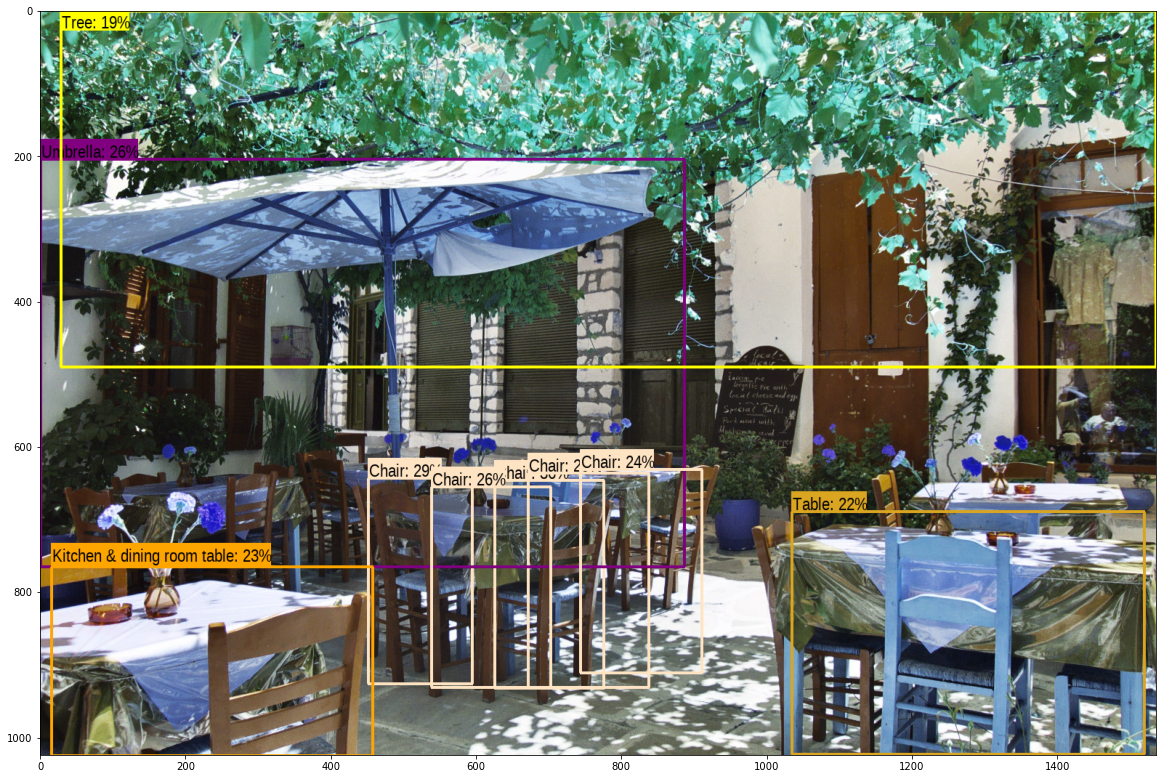

In [3]:
img = cv2.imread("Naxos_Taverna.jpg")
run_detector(detector,img)

In [4]:
cap = cv2.VideoCapture('JAMES_BOND_IN_ACTION_007_IN_INDIA.mp4')
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)

print("Width x Height = %d x %d, Frames = %d, Frames/second = %d\n"%(width,height,total_frames,fps))

Width x Height = 640 x 272, Frames = 5887, Frames/second = 25



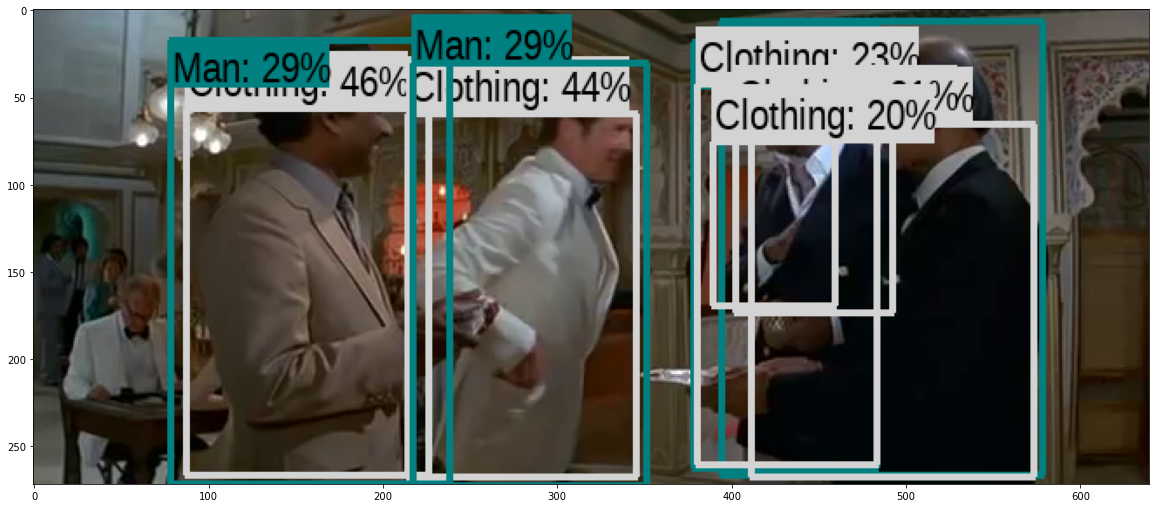

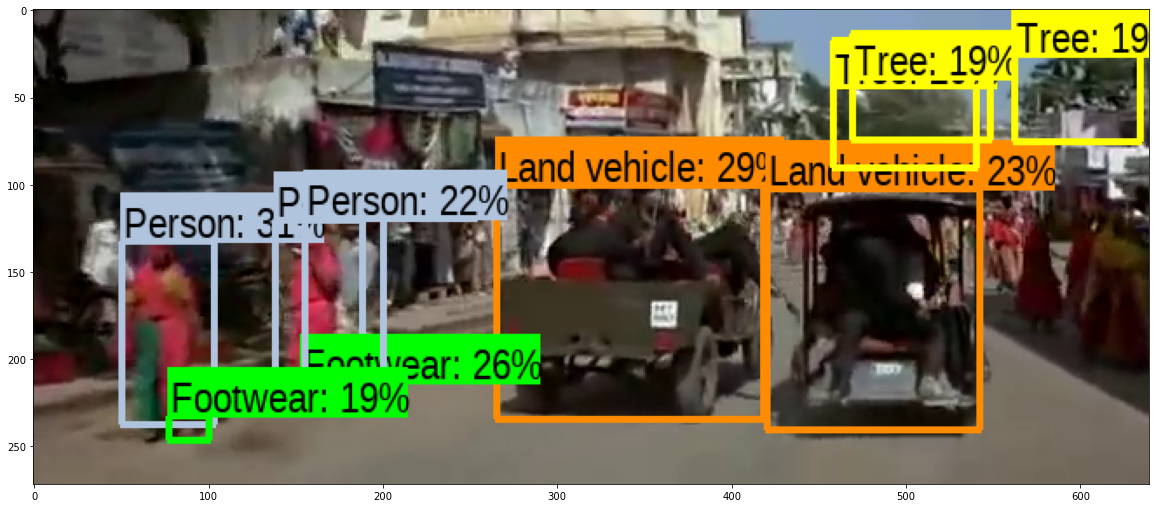

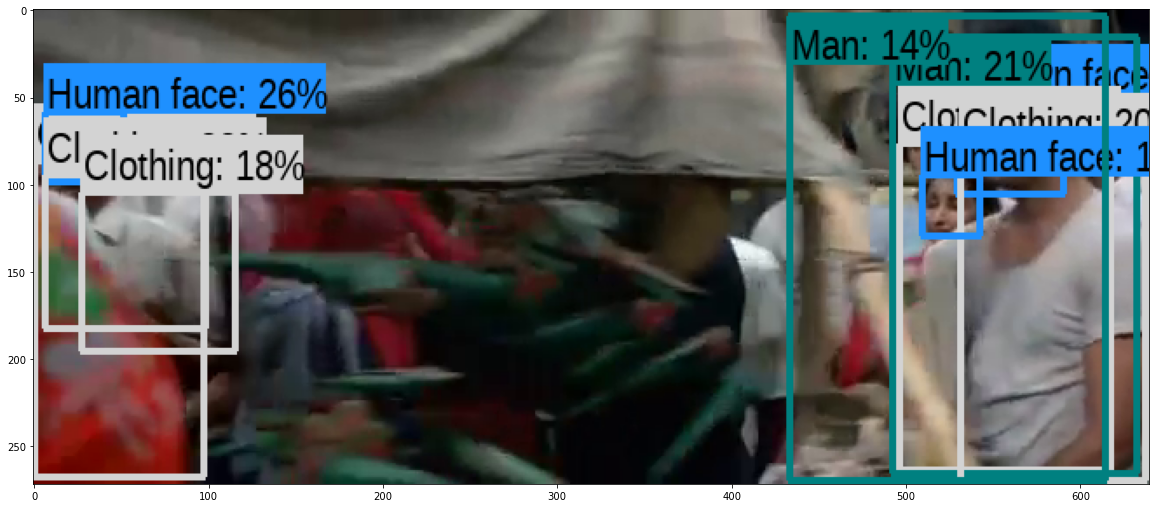

In [5]:
cap = cv2.VideoCapture('JAMES_BOND_IN_ACTION_007_IN_INDIA.mp4')
for i in range(1,total_frames,2000):
    cap.set(cv2.CAP_PROP_POS_FRAMES,i)
    ret,frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    run_detector(detector,frame)